# Notebook For Radar Analysis

In [2]:
import glob

radar_data_glob = glob.glob("dataset/*/*/radar.npy")
radar_data_conf_glob = glob.glob("dataset/*/*/config.json")


In [3]:
for datanya in radar_data_glob:
    print("data : " + datanya)
for datanya in radar_data_conf_glob:
    print("conf : " + datanya)
# print(radar_data_conf_glob)
# print(radar_data_glob)

data : dataset\BGT60TR13C_record_napaszhar20240605-140226\RadarIfxAvian_00\radar.npy
data : dataset\BGT60TR13C_record_napaszhar_220240605-140404\RadarIfxAvian_00\radar.npy
data : dataset\BGT60TR13C_record_nonapaszhar20240605-135608\RadarIfxAvian_00\radar.npy
conf : dataset\BGT60TR13C_record_napaszhar20240605-140226\RadarIfxAvian_00\config.json
conf : dataset\BGT60TR13C_record_napaszhar_220240605-140404\RadarIfxAvian_00\config.json
conf : dataset\BGT60TR13C_record_nonapaszhar20240605-135608\RadarIfxAvian_00\config.json


In [4]:
import numpy as np

data_sample = np.load(radar_data_glob[0])

In [5]:
antenna1_sample = data_sample[:,0,:,:]
antenna2_sample = data_sample[:,1,:,:]
antenna3_sample = data_sample[:,2,:,:]

In [6]:
antenna1_sample.shape

(12000, 1, 64)

In [7]:

# Python program to read
# json file
 
import json
 
# Opening JSON file
f = open(radar_data_conf_glob[0])
 
# returns JSON object as 
# a dictionary
data_sample_config = json.load(f)
 
# Iterating through the json
# list
# for i in data['emp_details']:
#     print(i)
 
# Closing file
f.close()
pretty_json = json.dumps(data_sample_config, indent=2)
print(pretty_json)

{
  "device_config": {
    "fmcw_single_shape": {
      "aaf_cutoff_Hz": 500000,
      "chirp_repetition_time_s": 3.9999998989515007e-05,
      "end_frequency_Hz": 63500000000,
      "frame_repetition_time_s": 0.004999999888241291,
      "hp_cutoff_Hz": 80000,
      "if_gain_dB": 23,
      "mimo_mode": "off",
      "num_chirps_per_frame": 1,
      "num_samples_per_chirp": 64,
      "rx_antennas": [
        1,
        2,
        3
      ],
      "sample_rate_Hz": 2000000,
      "start_frequency_Hz": 58000000000,
      "tx_antennas": [
        1
      ],
      "tx_power_level": 31
    }
  }
}


In [8]:
import argparse
from collections import namedtuple
from scipy import signal

from helpers.fft_spectrum import *

In [9]:
data_sample_config["device_config"]

{'fmcw_single_shape': {'aaf_cutoff_Hz': 500000,
  'chirp_repetition_time_s': 3.9999998989515007e-05,
  'end_frequency_Hz': 63500000000,
  'frame_repetition_time_s': 0.004999999888241291,
  'hp_cutoff_Hz': 80000,
  'if_gain_dB': 23,
  'mimo_mode': 'off',
  'num_chirps_per_frame': 1,
  'num_samples_per_chirp': 64,
  'rx_antennas': [1, 2, 3],
  'sample_rate_Hz': 2000000,
  'start_frequency_Hz': 58000000000,
  'tx_antennas': [1],
  'tx_power_level': 31}}

In [10]:
# Distance FFT
from helpers.DistanceAlgo_2 import *

algo = DistanceAlgo_2(data_sample_config["device_config"]["fmcw_single_shape"],data_sample_config["device_config"]["fmcw_single_shape"]["num_chirps_per_frame"])
len_frame = antenna1_sample.shape[0]

print("Length of Frames : "+str(len_frame))
i_ant = 0
distance_samples = np.zeros(data_sample.shape)
distance_list = algo.range_bin_length * np.arange(0,data_sample_config["device_config"]["fmcw_single_shape"]["num_samples_per_chirp"])
distance_list.shape

for frame_number in range(len_frame):
    frame_contents = data_sample[frame_number,:,:,:]
    # frame_data = frame_contents[0]
    antenna_samples = frame_contents[i_ant, :, :]
    distance_peak_m, distance_data = algo.compute_distance(antenna_samples)
    distance_samples[frame_number,i_ant,0] = distance_data
    
    # print("Distance:" + format(distance_peak_m, "^05.3f") + "m")

Length of Frames : 12000


In [11]:
distance_list = algo.range_bin_length * np.arange(0,data_sample_config["device_config"]["fmcw_single_shape"]["num_samples_per_chirp"])
distance_list.shape

(64,)

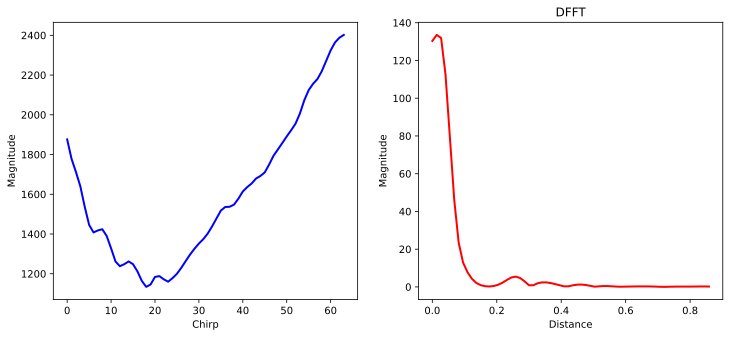

In [25]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 100
pyplot.rcParams['savefig.dpi'] = 100

import matplotlib.pyplot as plt
#import seaborn as sns

x1 = np.arange(0,data_sample_config["device_config"]["fmcw_single_shape"]["num_samples_per_chirp"])
x2 = distance_list
y1 = data_sample[0,i_ant,0,:]
y2 = distance_samples[0,i_ant,0,:]

# plt.rcParams['figure.format'] = 'svg'

# Create a figure and axes.
fig = plt.figure(figsize=(12,5),)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# Set up the subplots
# ax1.set_xlim((0,2))
# ax1.set_ylim((-2,2))
ax1.set_xlabel('Chirp')
ax1.set_ylabel('Magnitude')

# ax2.set_xlim((-2,2))
# ax2.set_ylim((-2,2))
ax2.set_xlabel('Distance')
ax2.set_ylabel('Magnitude')
ax2.set_title('DFFT')

# Create objects that will change in the animiation.
# These objects are initially empty, and will be given new values for each frame in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot(x1, y1, 'b', lw=2)  # ax.plot returns a list of 2D line objects.
line2, = ax2.plot(x2, y2, 'r', lw=2)
# pt1, = ax2.plot([], [], 'g.', ms=20)
# line3, = ax2.plot([], [], 'y', lw=2)
# x1 = np.arange(0,data_sample_config["device_config"]["fmcw_single_shape"]["num_samples_per_chirp"])
# x2 = distance_list
# for n in range(len_frame):
    
#     y1 = data_sample[n,i_ant,0,:]
#     y2 = distance_samples[n,i_ant,0,:]
    
#     line1, = ax1.plot(x1, y1, 'b', lw=2)  # ax.plot returns a list of 2D line objects.
#     line2, = ax2.plot(x2, y2, 'r', lw=2)
#     plt.show()
# ax1.legend(['Chirp', 'cos']);

In [26]:
# Animation function. This function is called sequentially.
def drawframe(n):
    # x = np.linspace(0, 2, 1000)
    # y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    # y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    x1 = np.arange(0,data_sample_config["device_config"]["fmcw_single_shape"]["num_samples_per_chirp"])
    x2 = distance_list
    y1 = data_sample[n,i_ant,0,:]
    y2 = distance_samples[n,i_ant,0,:]
    
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    # line3.set_data(y1[0:50],y2[0:50])
    # pt1.set_data([y1[0]], [y2[0]])   # Note that matplotlib will throw an error if we supply only numbers (i.e., pt1.set_data(y1[0],y2[0]))
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [27]:
# Initialization function.
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return(line1, line2)

In [28]:
from matplotlib import animation

#anim = animation.FuncAnimation(fig, drawframe, init_func=init, frames=100, interval=20, blit=True)
# anim = animation.FuncAnimation(fig, drawframe, frames=round(len_frame/10), interval=1, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=round(len_frame), interval=0.01, blit=True)
# blit = True re-draws only the parts that have changed.

In [29]:
import matplotlib
# anim.save(filename="pillow_example.gif", writer="pillow")
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [30]:
from IPython.display import HTML
HTML(anim.to_jshtml())


KeyboardInterrupt



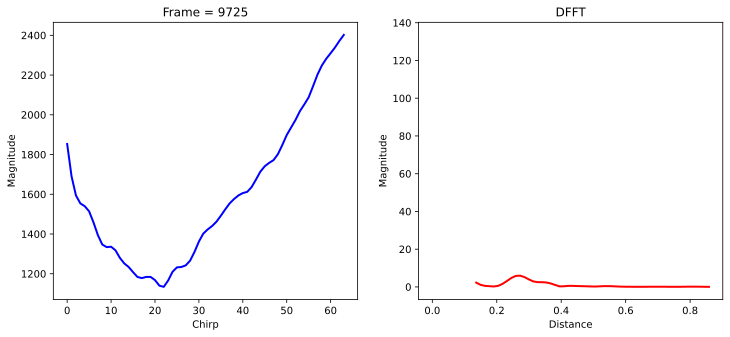

In [ ]:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')
from IPython.display import clear_output, display
for n in range(len_frame):
    
    y1 = data_sample[n,i_ant,0,:]
    y2 = distance_samples[n,i_ant,0,:]
    
    # line1, = ax1.plot(x1, y1, 'b', lw=2)  # ax.plot returns a list of 2D line objects.
    # line2, = ax2.plot(x2, y2, 'r', lw=2)
    line1.set_data(x1, y1)
    line2.set_data(x2[10:], y2[10:])
    # animate(i)
    clear_output(wait=True)
    display(fig)    
    plt.show()

In [ ]:
anim.save(filename="datanya.gif", writer="pillow")

In [ ]:
!pip install croquis

In [ ]:
# Please paste into a Jupyter cell.

import croquis
import numpy as np

fig = croquis.plot()

for fn in np.sin, np.cos, np.tanh:
    X = np.linspace(-5, 5, 100)
    Y = fn(X)
    fig.add(X, Y, label=fn.__name__)

fig.show()